# Test of the netCDF data written for CI evaluation

In [1]:
%matplotlib inline

import os, sys, glob

import pylab as pl
pl.rcParams['figure.figsize'] = (16.0, 12.0)
pl.rcParams['font.size'] = 16.0

import numpy as np
import datetime
import scipy.ndimage

import io_tools.netcdf as ncio
from plotting_tools.bmaps import make_map

from standard_config import *

/vols/talos/local/anaconda2-5.0.0/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Read example file

In [2]:
fname = '/vols/talos/home/stephan/proj/2018-05_cieval/data/ci30/cieval_ci30_radolan_20100525.nc'

print fname

/vols/talos/home/stephan/proj/2018-05_cieval/data/ci30/cieval_ci30_radolan_20100525.nc


In [3]:
!ncdump -h /vols/talos/home/stephan/proj/2018-05_cieval/data/haci/cieval_haci_radolan_20100525.nc

netcdf cieval_haci_radolan_20100525 {
dimensions:
	time = 96 ;
	nx = 900 ;
	ny = 900 ;
variables:
	short haci(time, nx, ny) ;
		haci:_FillValue = -1s ;
		haci:coordinates = "lat lon" ;
	float lat(nx, ny) ;
		lat:_FillValue = NaNf ;
	float lon(nx, ny) ;
		lon:_FillValue = NaNf ;
	int64 time(time) ;
		time:units = "minutes since 2010-05-25 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;

// global attributes:
		:title = "haci data for 20100525 on radolan grid." ;
		:institution = "Leibniz Institute for Tropospheric Research" ;
		:contact_person = "Stephan Lenk, lenk@tropos.de" ;
		:processing_time = "20180608T08:37:42" ;
		:author = "Stephan Lenk, lenk@tropos.de" ;
		:license = "For non-commercial use only." ;
		:units = 1LL ;
		:source = "HACI algorithm to detect isolated CI" ;
		:history = "Created by HACI algorithm, aggregated for 15 minutes time steps." ;
		:summary = "Isolated convective objects derived from precipitation radar data with reflectivity threshold of 35 dBZ,life t

In [4]:
def input_ci_data(date, vname, itime, read_georef = False):
    
    fdir = '/vols/talos/home/stephan/proj/2018-05_cieval/data'
    fname = '%s/%s/cieval_%s_radolan_%s.nc' % (fdir, vname, vname, date)


    v = ncio.read_icon_4d_data( fname, [vname], itime = itime)[vname]
    
    if read_georef:
        geo = ncio.read_icon_4d_data( fname, ['lon', 'lat'], itime = None)
        lon, lat = geo['lon'], geo['lat']
    
        return lon, lat, v
    
    else:
        return v

In [8]:
itime = 50
vname = 'cma'
date = '20100628'
date = '20130620'



lon, lat, v = input_ci_data(date, vname, itime, read_georef = True )

## Plot data comparison

In [10]:
(x,y), mp = make_map(lon, lat, region = 'germ')


IOError: Unable to open boundary dataset file. Only the 'crude' and  'low',
resolution datasets are installed by default.
If you are requesting an, 'intermediate', 'high' or 'full'
resolution dataset, you may need to download and install those
files separately with
`conda install -c conda-forge basemap-data-hires`.

ci30


IOError: No such file or directory

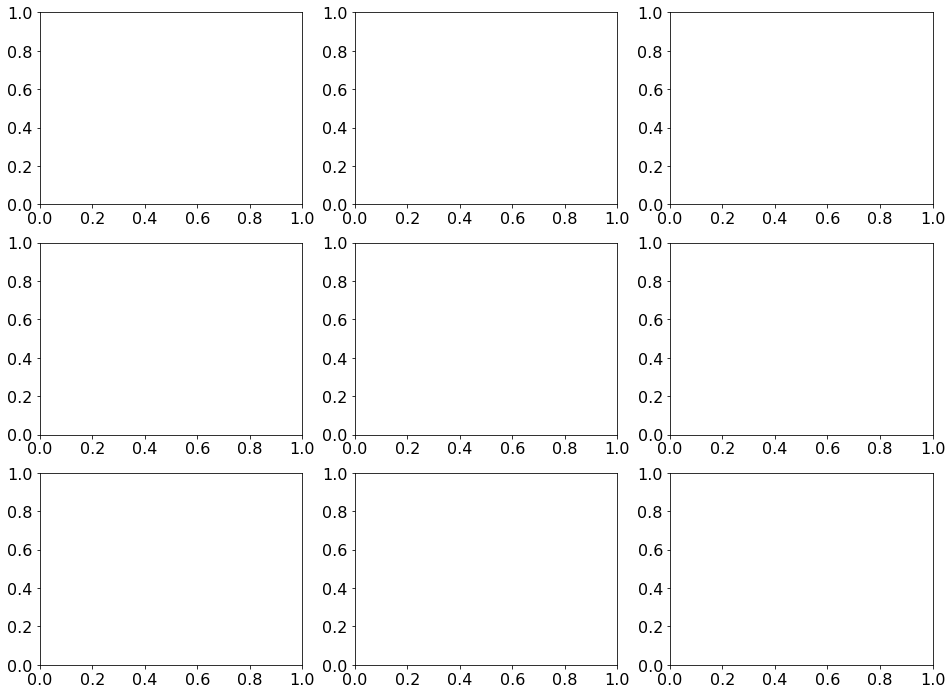

In [11]:
vlist = ['ci30', 'ci60', 'ci90', 'cma', 'ct',  'cth',  'haci',  'hrv' , 'ir108']

fig, axs = pl.subplots(ncols = 3, nrows = 3)
axs = axs.flatten()

d = {}
for n, vname in enumerate( vlist ): 
    
    print vname
    v = input_ci_data(date, vname, itime)
    d[vname] = v
    
    pl.sca( axs[n] )
    xy, mp = make_map( lon, lat, xy = (x,y), mp = mp)
    mp.pcolormesh(x, y, v)
    pl.title(vname)
    mp.colorbar()

### Coastline Tests

In [12]:
vname = 'hrv'
xy, mp = make_map( lon, lat, xy = (x,y), mp = mp)
mp.pcolormesh(x, y, d[vname], vmax = 0.3)
pl.title(vname)
mp.colorbar()

NameError: name 'x' is not defined

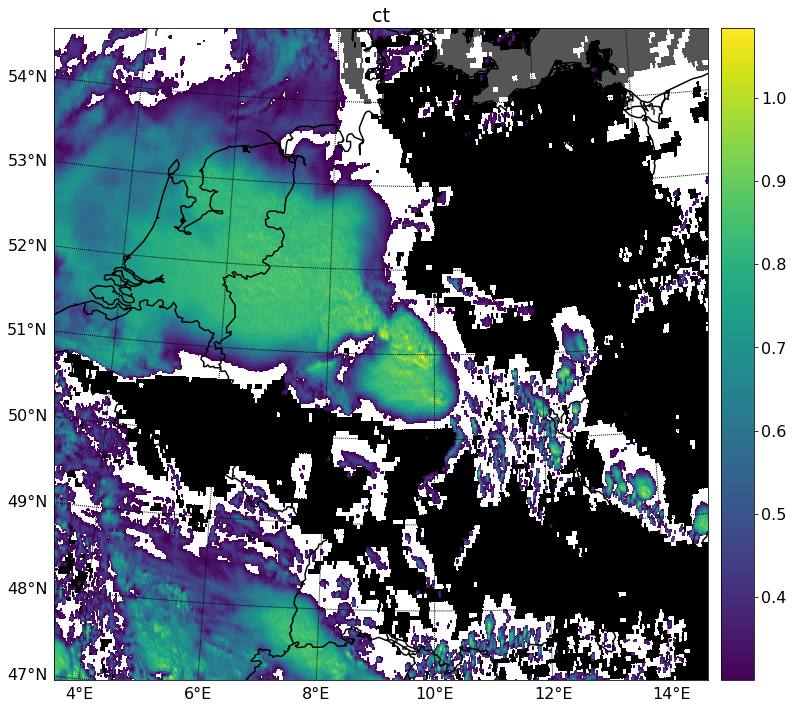

In [50]:
vname = 'ct'
xy, mp = make_map( lon, lat, xy = (x,y), mp = mp)
mp.pcolormesh(x, y, d[vname], vmax = 4, cmap = pl.cm.gray)
mp.pcolormesh(x, y, np.ma.masked_less(d['hrv'], 0.3))
pl.title(vname)
mp.colorbar()

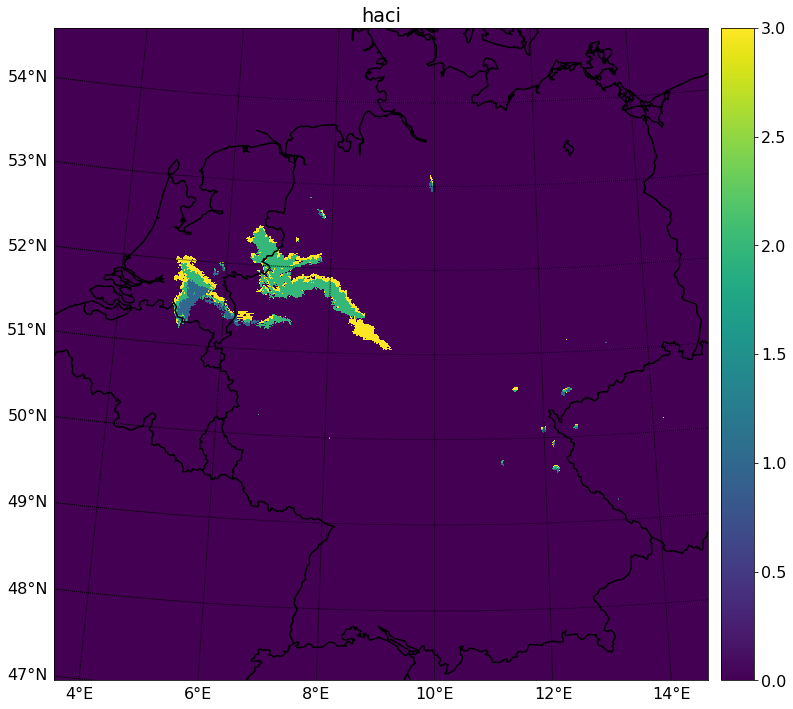

In [55]:
vname = 'haci'
xy, mp = make_map( lon, lat, xy = (x,y), mp = mp)
mp.pcolormesh(x, y, d[vname])
pl.title(vname)
mp.colorbar()